In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import seaborn as sns
sns.set()
import os
import glob
from tqdm import tqdm
import time
import math

In [2]:
plt.rcParams['figure.figsize'] = [25, 15]

In [3]:
delivery_info=pd.read_csv('../data/raw/meta_data/delivery_info.csv', index_col=0)
TS_delivery_info = delivery_info[delivery_info.index.str.match('TS')]
TF_delivery_info = delivery_info[delivery_info.index.str.match('TF')]
T_delivery_info = delivery_info[~delivery_info.index.str.match('TS|TF')]

In [4]:
T_open_interest = pd.read_csv('../data/interim/raw_features/T/T_Open_Interest.csv', index_col=0, parse_dates=True)
TF_open_interest = pd.read_csv('../data/interim/raw_features/TF/TF_Open_Interest.csv', index_col=0, parse_dates=True)

## Abosolute Value

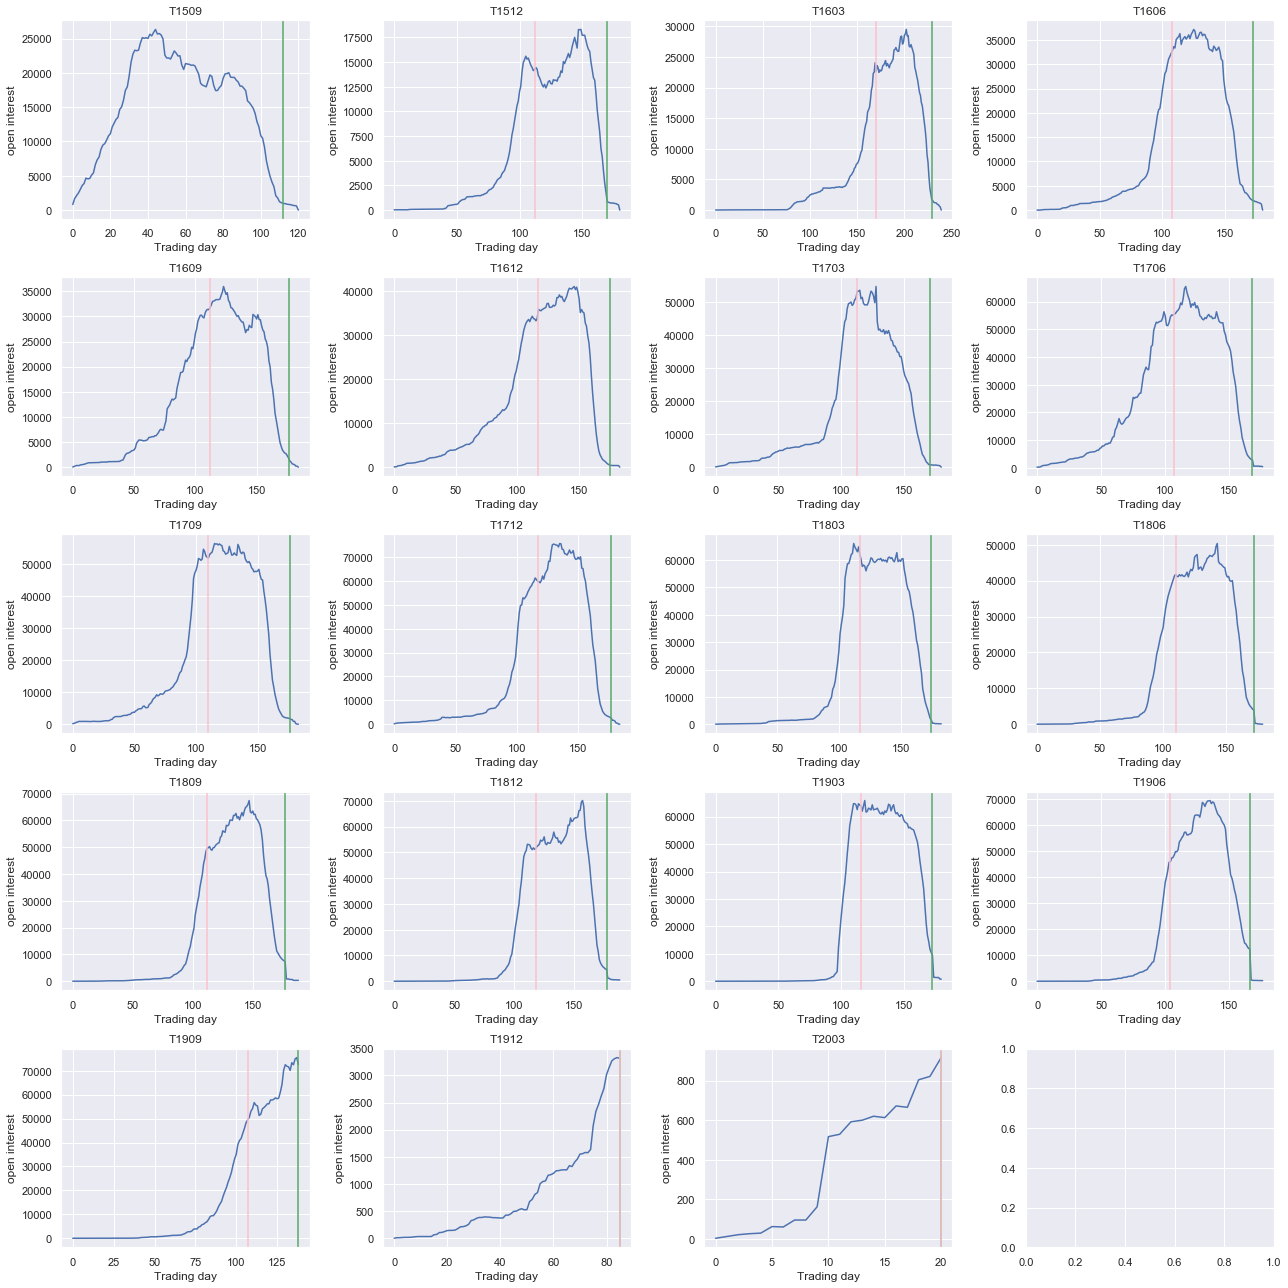

In [5]:
fig, ax = plt.subplots(math.ceil((T_open_interest.shape[1]) / 4), 4, figsize=(18, 18))

for i, contract in enumerate(T_open_interest.columns):
    j = int(i / 4)
    k = i % 4

    ax[j][k].plot(range(len(T_open_interest[contract].dropna())), T_open_interest[contract].dropna())
    
    intention_day = T_delivery_info['intention_day'][contract]
    intention_idx = (T_open_interest[contract].dropna())[:intention_day].shape[0] - 1
    ax[j][k].axvline(x=intention_idx, c='g')
        
    if contract != T_delivery_info.index[0]:
        last_intention_day = T_delivery_info['intention_day'][:contract][-2]
        last_intention_idx = (T_open_interest[contract].dropna())[:last_intention_day].shape[0] - 1
        ax[j][k].axvline(x=last_intention_idx, c='pink')
        
    ax[j][k].set_xlabel("Trading day")
    ax[j][k].set_ylabel('open interest')
    ax[j][k].set_title(contract)

plt.tight_layout()
plt.show()

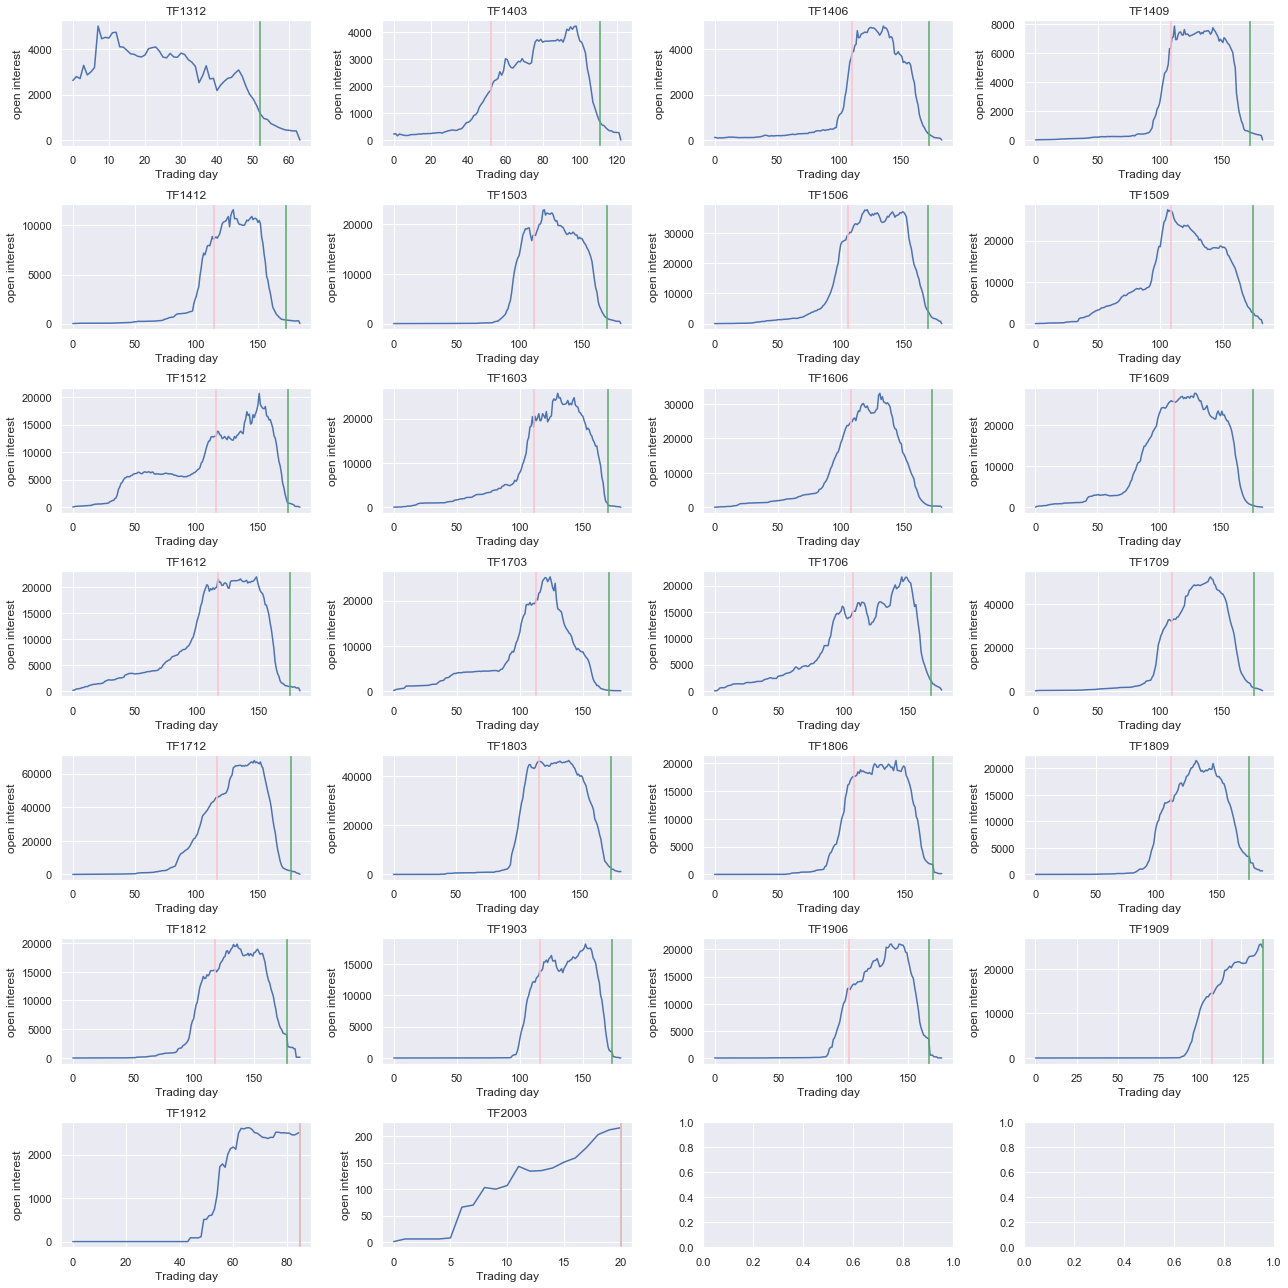

In [6]:
fig, ax = plt.subplots(math.ceil((TF_open_interest.shape[1]) / 4), 4, figsize=(18, 18))

for i, contract in enumerate(TF_open_interest.columns):
    j = int(i / 4)
    k = i % 4

    ax[j][k].plot(range(len(TF_open_interest[contract].dropna())), TF_open_interest[contract].dropna())
    
    intention_day = TF_delivery_info['intention_day'][contract]
    intention_idx = (TF_open_interest[contract].dropna())[:intention_day].shape[0] - 1
    ax[j][k].axvline(x=intention_idx, c='g')
        
    if contract != TF_delivery_info.index[0]:
        last_intention_day = TF_delivery_info['intention_day'][:contract][-2]
        last_intention_idx = (TF_open_interest[contract].dropna())[:last_intention_day].shape[0] - 1
        ax[j][k].axvline(x=last_intention_idx, c='pink')
        
    ax[j][k].set_xlabel("Trading day")
    ax[j][k].set_ylabel('open interest')
    ax[j][k].set_title(contract)

plt.tight_layout()
plt.show()

## Rolling mean

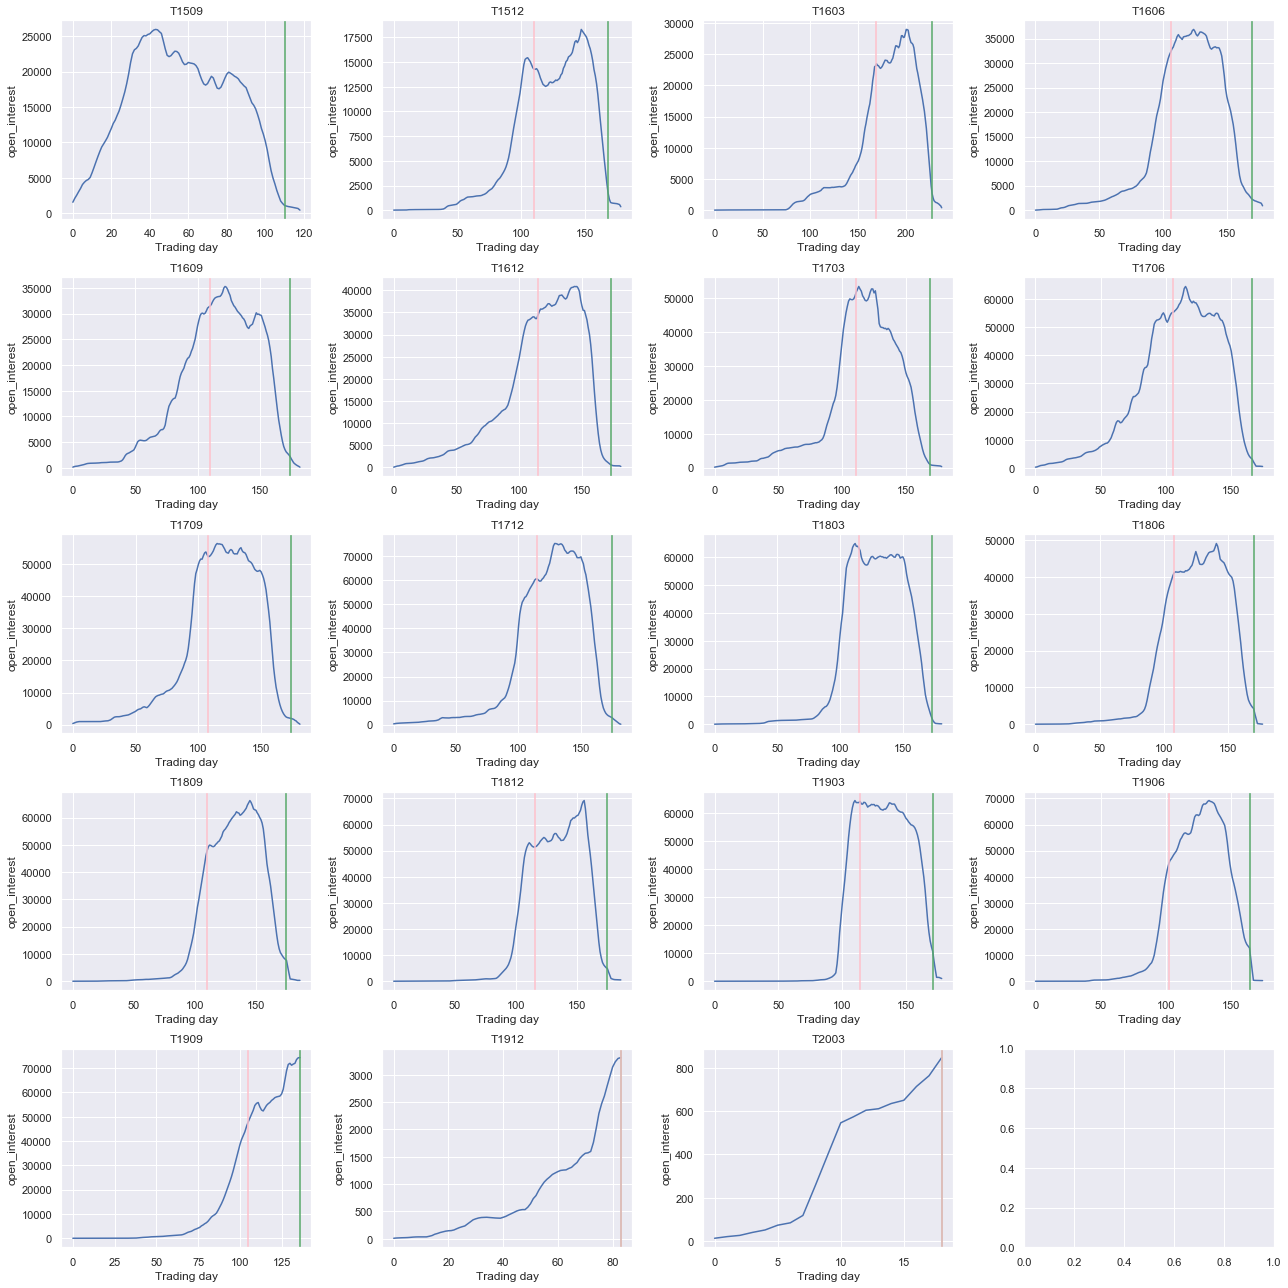

In [7]:
fig, ax = plt.subplots(math.ceil((T_open_interest.shape[1]) / 4), 4, figsize=(18, 18))

for i, contract in enumerate(T_open_interest.columns):
    j = int(i / 4)
    k = i % 4
    
    sample = T_open_interest[contract].rolling(3).mean().dropna()
    ax[j][k].plot(range(len(sample)), sample)
    
    intention_day = T_delivery_info['intention_day'][contract]
    intention_idx = sample[:intention_day].shape[0] - 1
    ax[j][k].axvline(x=intention_idx, c='g')
    
    if contract != T_delivery_info.index[0]:
        last_intention_day = T_delivery_info['intention_day'][:contract][-2]
        last_intention_idx = sample[:last_intention_day].shape[0] - 1
        ax[j][k].axvline(x=last_intention_idx, c='pink') 
        
    ax[j][k].set_xlabel("Trading day")
    ax[j][k].set_ylabel('open_interest')
    ax[j][k].set_title(contract)

plt.tight_layout()
plt.show()

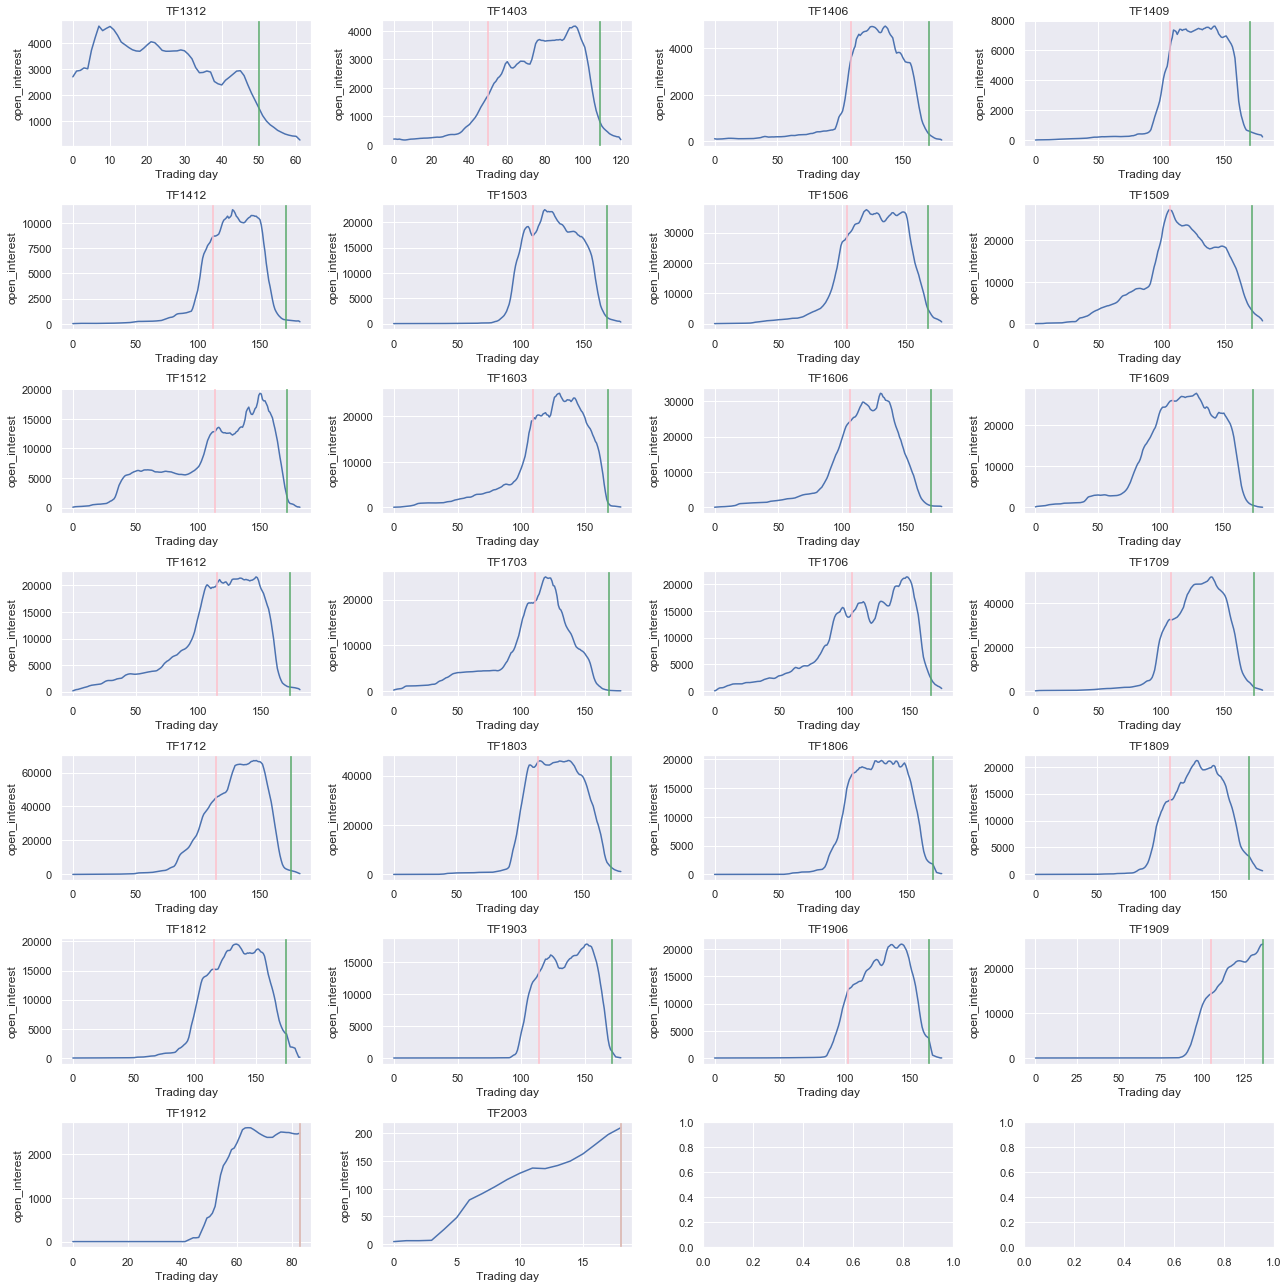

In [8]:
fig, ax = plt.subplots(math.ceil((TF_open_interest.shape[1]) / 4), 4, figsize=(18, 18))

for i, contract in enumerate(TF_open_interest.columns):
    j = int(i / 4)
    k = i % 4
    
    sample = TF_open_interest[contract].rolling(3).mean().dropna()
    ax[j][k].plot(range(len(sample)), sample)
    
    intention_day = TF_delivery_info['intention_day'][contract]
    intention_idx = sample[:intention_day].shape[0] - 1
    ax[j][k].axvline(x=intention_idx, c='g')
    
    if contract != TF_delivery_info.index[0]:
        last_intention_day = TF_delivery_info['intention_day'][:contract][-2]
        last_intention_idx = sample[:last_intention_day].shape[0] - 1
        ax[j][k].axvline(x=last_intention_idx, c='pink') 
        
    ax[j][k].set_xlabel("Trading day")
    ax[j][k].set_ylabel('open_interest')
    ax[j][k].set_title(contract)

plt.tight_layout()
plt.show()

## Rolling Std

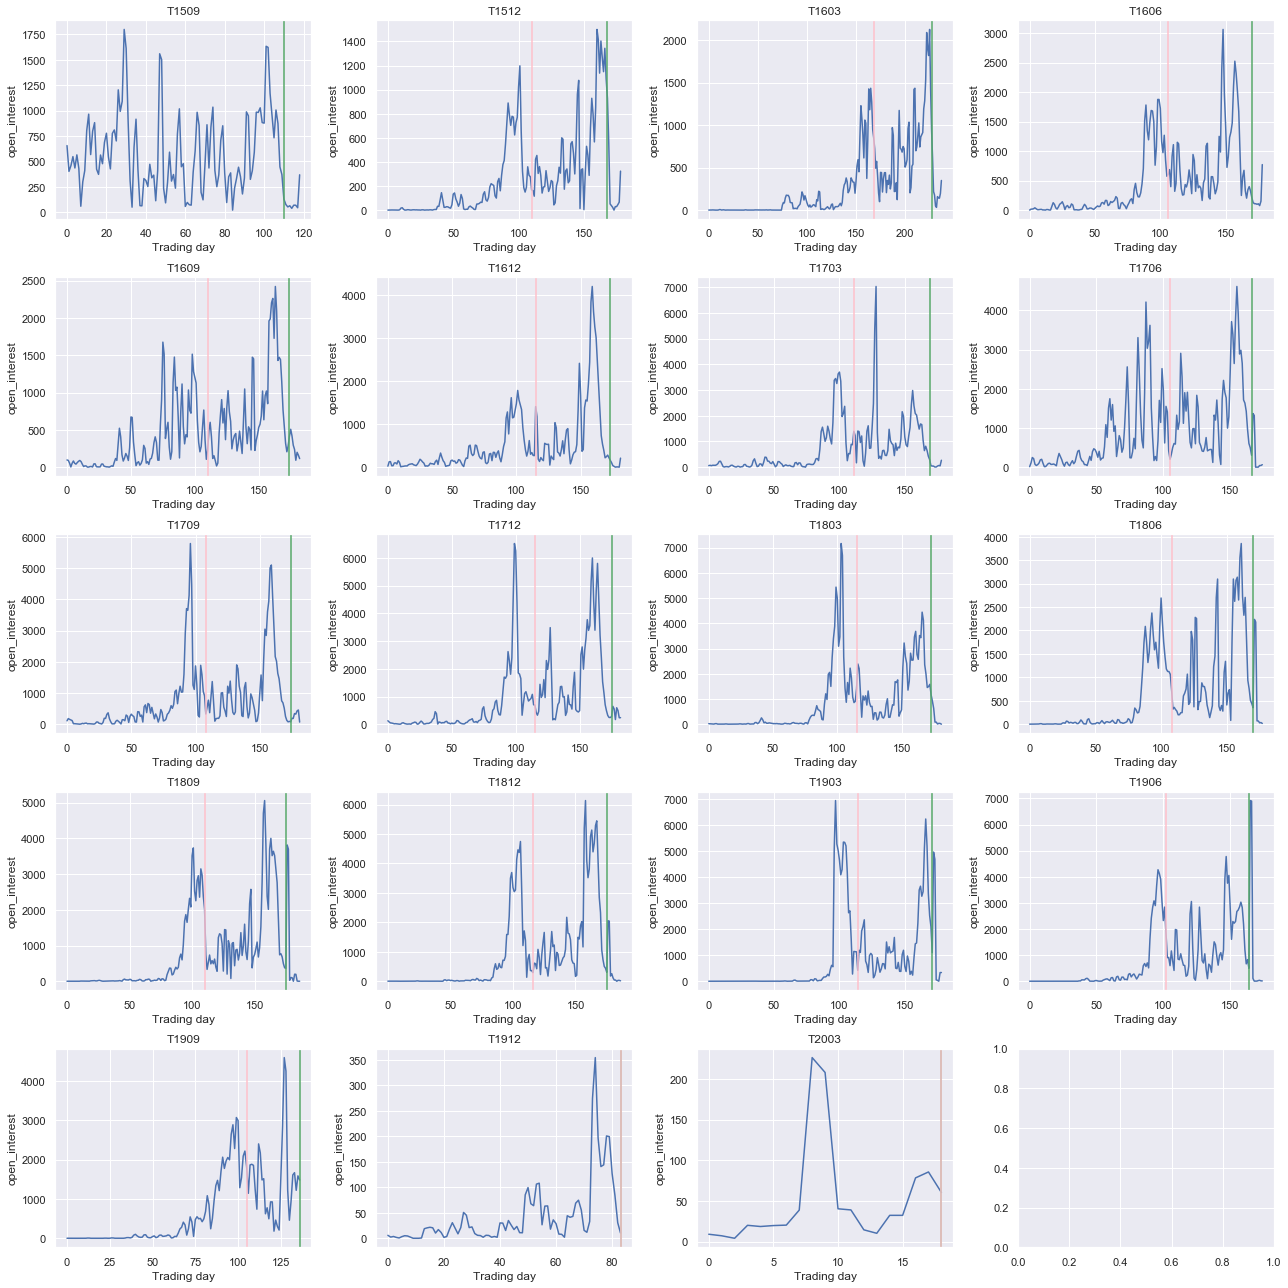

In [9]:
fig, ax = plt.subplots(math.ceil((T_open_interest.shape[1]) / 4), 4, figsize=(18, 18))

for i, contract in enumerate(T_open_interest.columns):
    j = int(i / 4)
    k = i % 4
    
    sample = T_open_interest[contract].rolling(3).std().dropna()
    ax[j][k].plot(range(len(sample)), sample)
    
    intention_day = T_delivery_info['intention_day'][contract]
    intention_idx = sample[:intention_day].shape[0] - 1
    ax[j][k].axvline(x=intention_idx, c='g')
    
    if contract != T_delivery_info.index[0]:
        last_intention_day = T_delivery_info['intention_day'][:contract][-2]
        last_intention_idx = sample[:last_intention_day].shape[0] - 1
        ax[j][k].axvline(x=last_intention_idx, c='pink') 
        
    ax[j][k].set_xlabel("Trading day")
    ax[j][k].set_ylabel('open_interest')
    ax[j][k].set_title(contract)

plt.tight_layout()
plt.show()

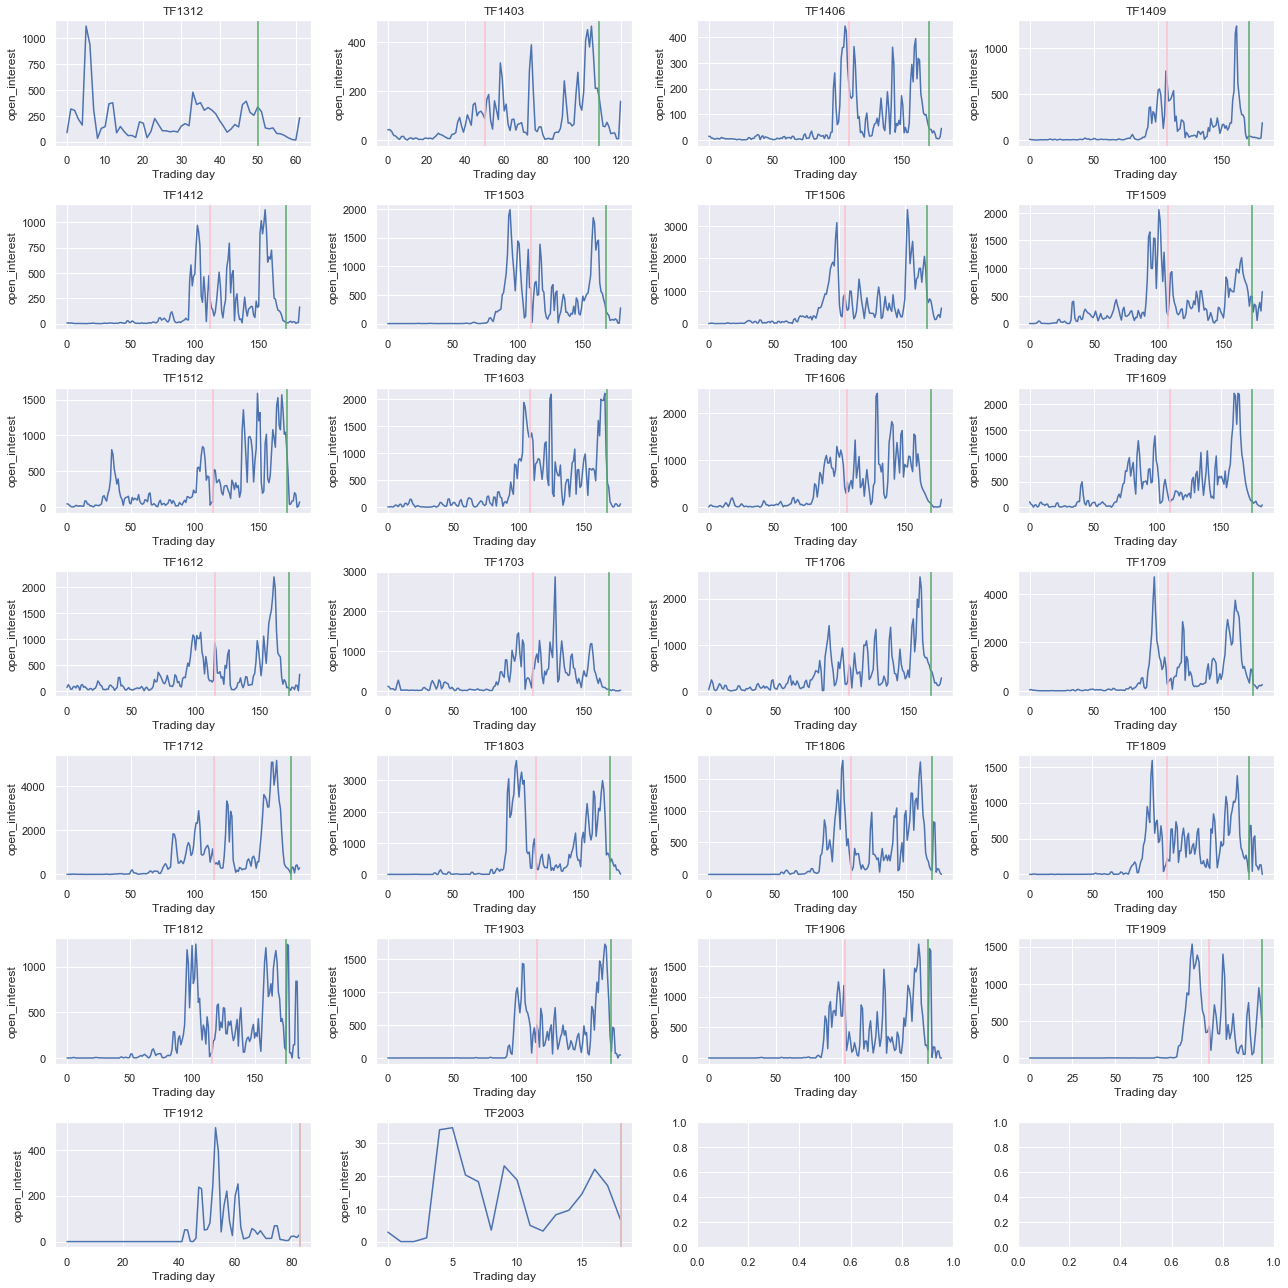

In [11]:
fig, ax = plt.subplots(math.ceil((TF_open_interest.shape[1]) / 4), 4, figsize=(18, 18))

for i, contract in enumerate(TF_open_interest.columns):
    j = int(i / 4)
    k = i % 4
    
    sample = TF_open_interest[contract].rolling(3).std().dropna()
    ax[j][k].plot(range(len(sample)), sample)
    
    intention_day = TF_delivery_info['intention_day'][contract]
    intention_idx = sample[:intention_day].shape[0] - 1
    ax[j][k].axvline(x=intention_idx, c='g')
    
    if contract != TF_delivery_info.index[0]:
        last_intention_day = TF_delivery_info['intention_day'][:contract][-2]
        last_intention_idx = sample[:last_intention_day].shape[0] - 1
        ax[j][k].axvline(x=last_intention_idx, c='pink') 
        
    ax[j][k].set_xlabel("Trading day")
    ax[j][k].set_ylabel('open_interest')
    ax[j][k].set_title(contract)

plt.tight_layout()
plt.show()

## Difference

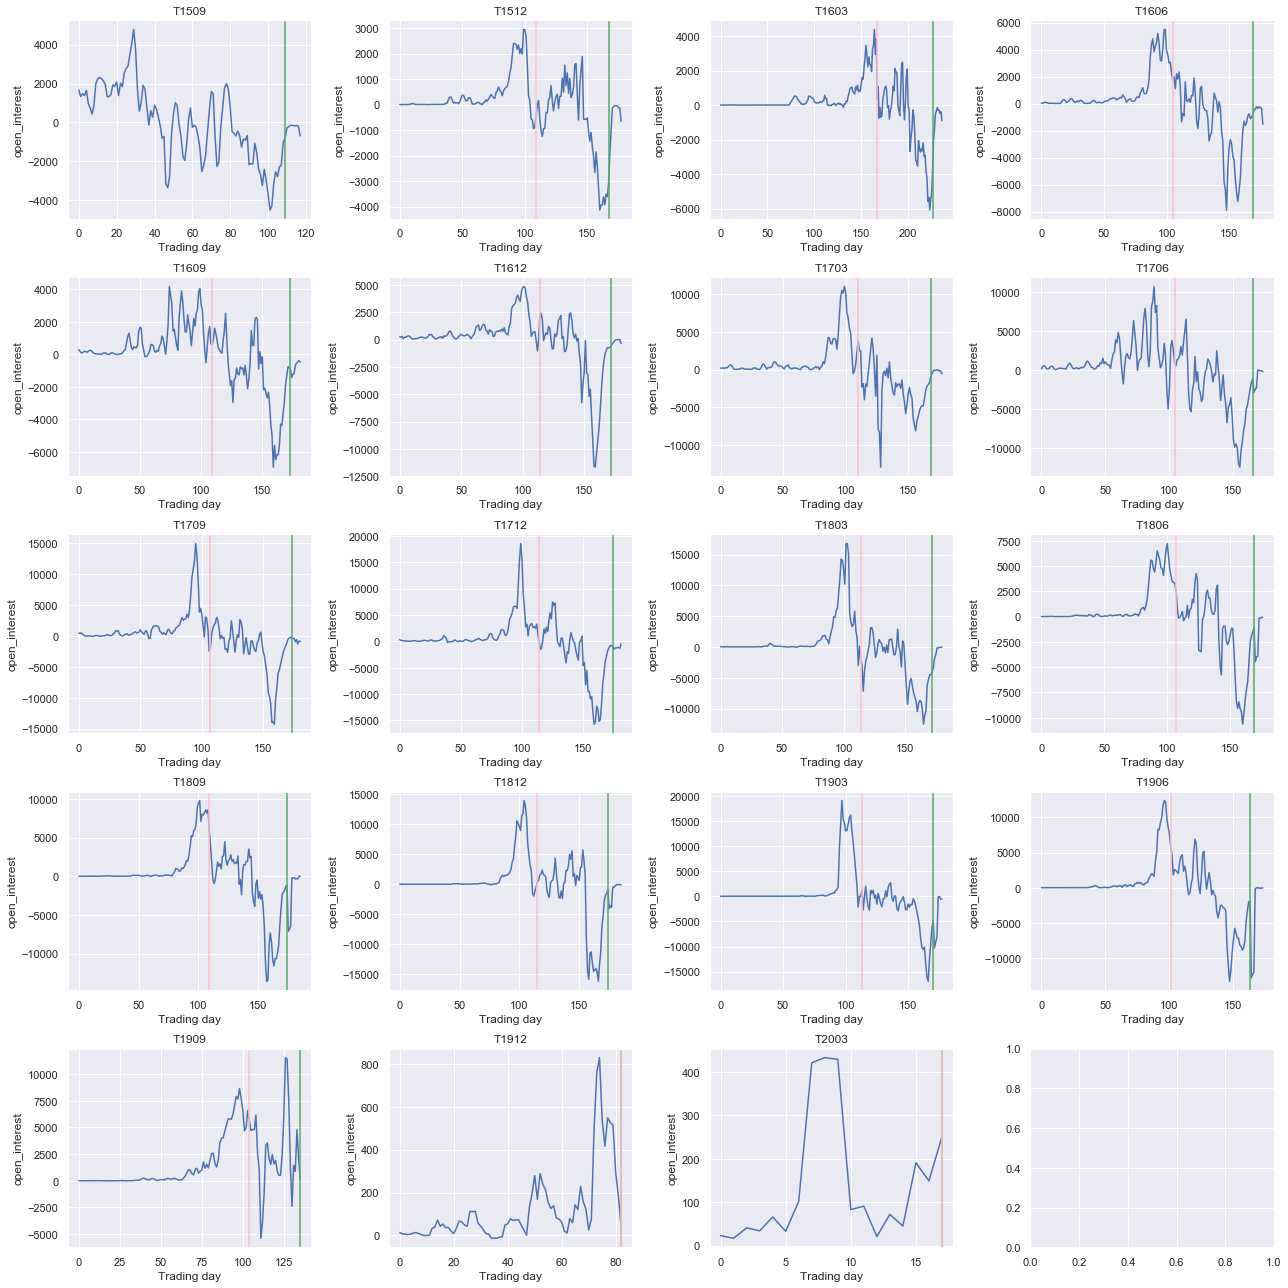

In [12]:
fig, ax = plt.subplots(math.ceil((T_open_interest.shape[1]) / 4), 4, figsize=(18, 18))

for i, contract in enumerate(T_open_interest.columns):
    j = int(i / 4)
    k = i % 4
    
    sample = T_open_interest[contract].diff(3).dropna()
    ax[j][k].plot(range(len(sample)), sample)
    
    intention_day = T_delivery_info['intention_day'][contract]
    intention_idx = sample[:intention_day].shape[0] - 1
    ax[j][k].axvline(x=intention_idx, c='g')
    
    if contract != T_delivery_info.index[0]:
        last_intention_day = T_delivery_info['intention_day'][:contract][-2]
        last_intention_idx = sample[:last_intention_day].shape[0] - 1
        ax[j][k].axvline(x=last_intention_idx, c='pink') 
        
    ax[j][k].set_xlabel("Trading day")
    ax[j][k].set_ylabel('open_interest')
    ax[j][k].set_title(contract)

plt.tight_layout()
plt.show()

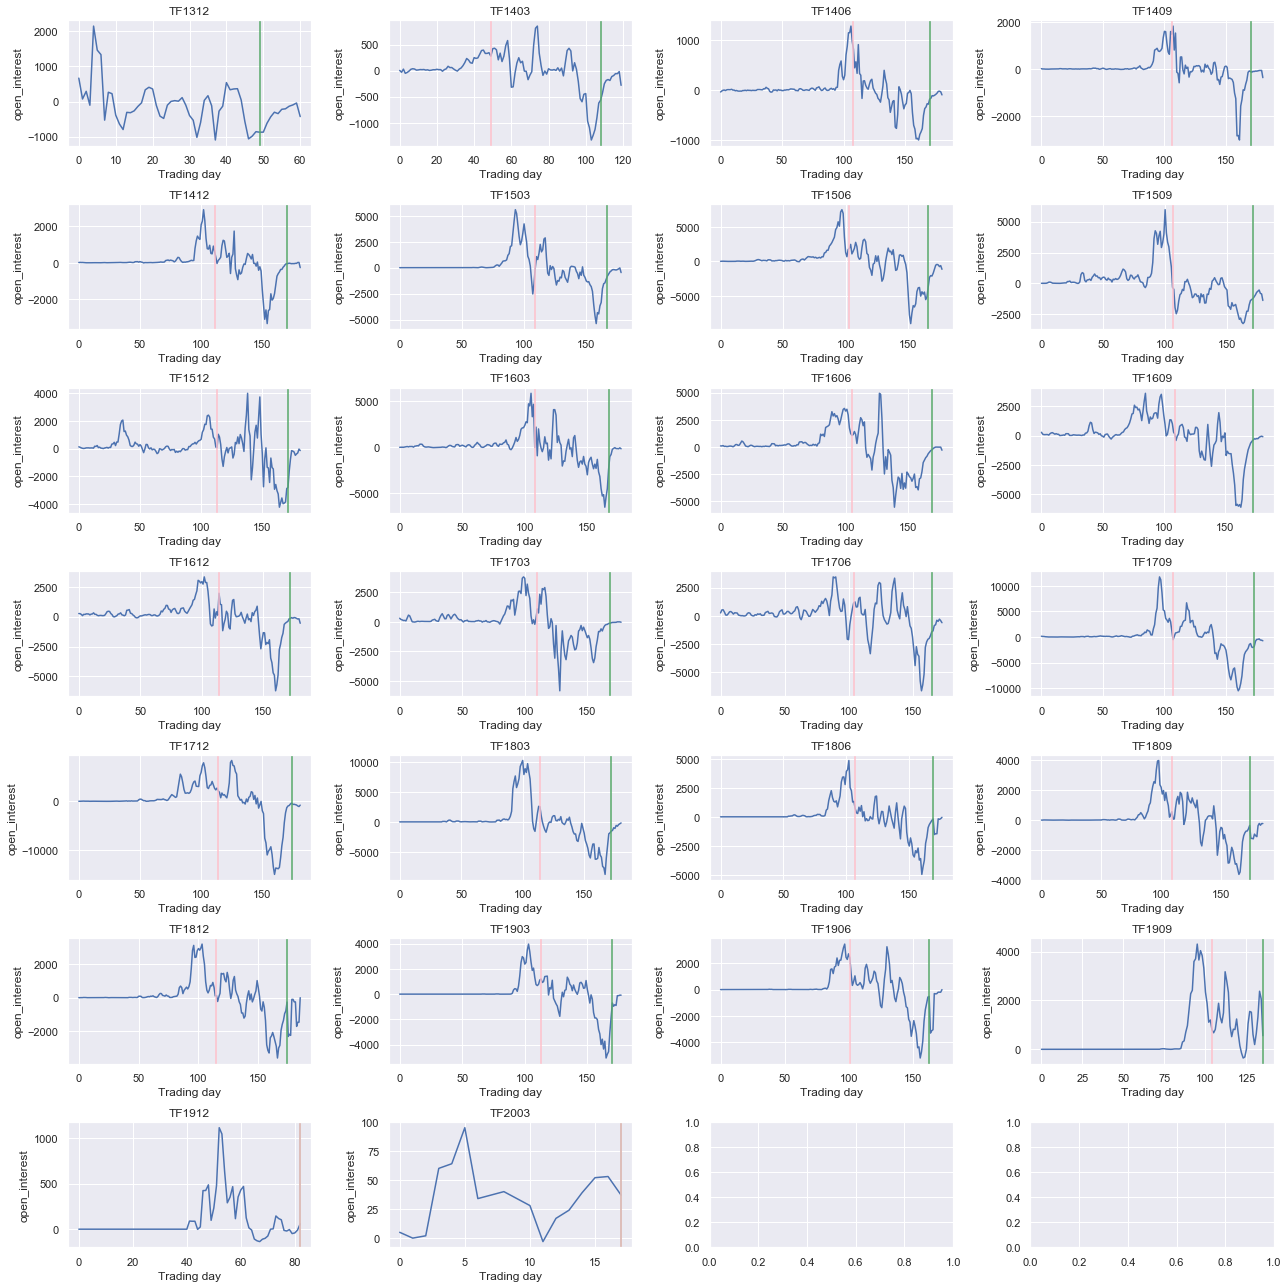

In [13]:
fig, ax = plt.subplots(math.ceil((TF_open_interest.shape[1]) / 4), 4, figsize=(18, 18))

for i, contract in enumerate(TF_open_interest.columns):
    j = int(i / 4)
    k = i % 4
    
    sample = TF_open_interest[contract].diff(3).dropna()
    ax[j][k].plot(range(len(sample)), sample)
    
    intention_day = TF_delivery_info['intention_day'][contract]
    intention_idx = sample[:intention_day].shape[0] - 1
    ax[j][k].axvline(x=intention_idx, c='g')
    
    if contract != TF_delivery_info.index[0]:
        last_intention_day = TF_delivery_info['intention_day'][:contract][-2]
        last_intention_idx = sample[:last_intention_day].shape[0] - 1
        ax[j][k].axvline(x=last_intention_idx, c='pink') 
        
    ax[j][k].set_xlabel("Trading day")
    ax[j][k].set_ylabel('open_interest')
    ax[j][k].set_title(contract)

plt.tight_layout()
plt.show()